In [1]:
from pandas.io.xml import preprocess_data
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
sns.set_theme(style="white")


In [2]:
def load_dataset(path:str)->pd.DataFrame:
    """
    Load the dataset from a csv file in the given path
    :param path: path in string
    :return: pd.Dataframe of the data
    """
    return pd.read_csv(path)

In [3]:
raw_data = load_dataset("../data/raw_data/card_transdata.csv")

In [4]:
def data_exploration(data:pd.DataFrame)->None:
    '''
    print out the basic information of the data
    first 5 head of the data,
    data description,
    data info,
    data decription of only int and float type,
    number of null values in each column
    :param data: data to be explored in pd.DataFrame
    :return: returns nothing
    '''
    print('Data Head')
    print(data.head())
    print('='*100)
    print('Data Description')
    print(data.describe(include='all'))
    print('='*100)
    print('Data Info')
    print(data.info())
    print('='*100)
    print('Data Description of only int and float type')
    data_numeric=data.select_dtypes(include=['int', 'float'])
    print(data_numeric)
    print('='*100)
    print('Data Description of object type')
    data_numeric=data.select_dtypes(include='object')
    if data_numeric.empty or data_numeric.columns.empty:
        print('No object type')
    else:
        print(data_numeric.describe(include='all'))
    print('='*100)
    print('Number of null values in each column')
    print(data.isnull().sum())

In [5]:
data_exploration(raw_data)

Data Head
   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0           1.0    0.0  
Data

In [6]:
# Now let's plot some important graphs to understand the dataset

def plot_dataset_overview(data: pd.DataFrame) -> None:
    '''
    Plot important graphs to understand the dataset
    '''
    plt.figure(figsize=(16, 12))


    plt.subplot(2, 2, 1)
    sns.countplot(x='fraud', data=data)
    plt.title('Fraud vs Non-Fraud Count')
    plt.xlabel('Fraud')
    plt.ylabel('Count')


    plt.subplot(2, 2, 2)
    sns.histplot(data=data, x='distance_from_home', hue='fraud', bins=50, kde=True, multiple='stack')
    plt.title('Distance from Home Distribution')


    plt.subplot(2, 2, 3)
    sns.histplot(data=data, x='distance_from_last_transaction', hue='fraud', bins=50, kde=True, multiple='stack')
    plt.title('Distance from Last Transaction Distribution')


    plt.subplot(2, 2, 4)
    sns.histplot(data=data, x='ratio_to_median_purchase_price', hue='fraud', bins=50, kde=True, multiple='stack')
    plt.title('Ratio to Median Purchase Price Distribution')

    plt.tight_layout()
    plt.savefig('../assets/figures/dataset_overview.png')
    plt.show()



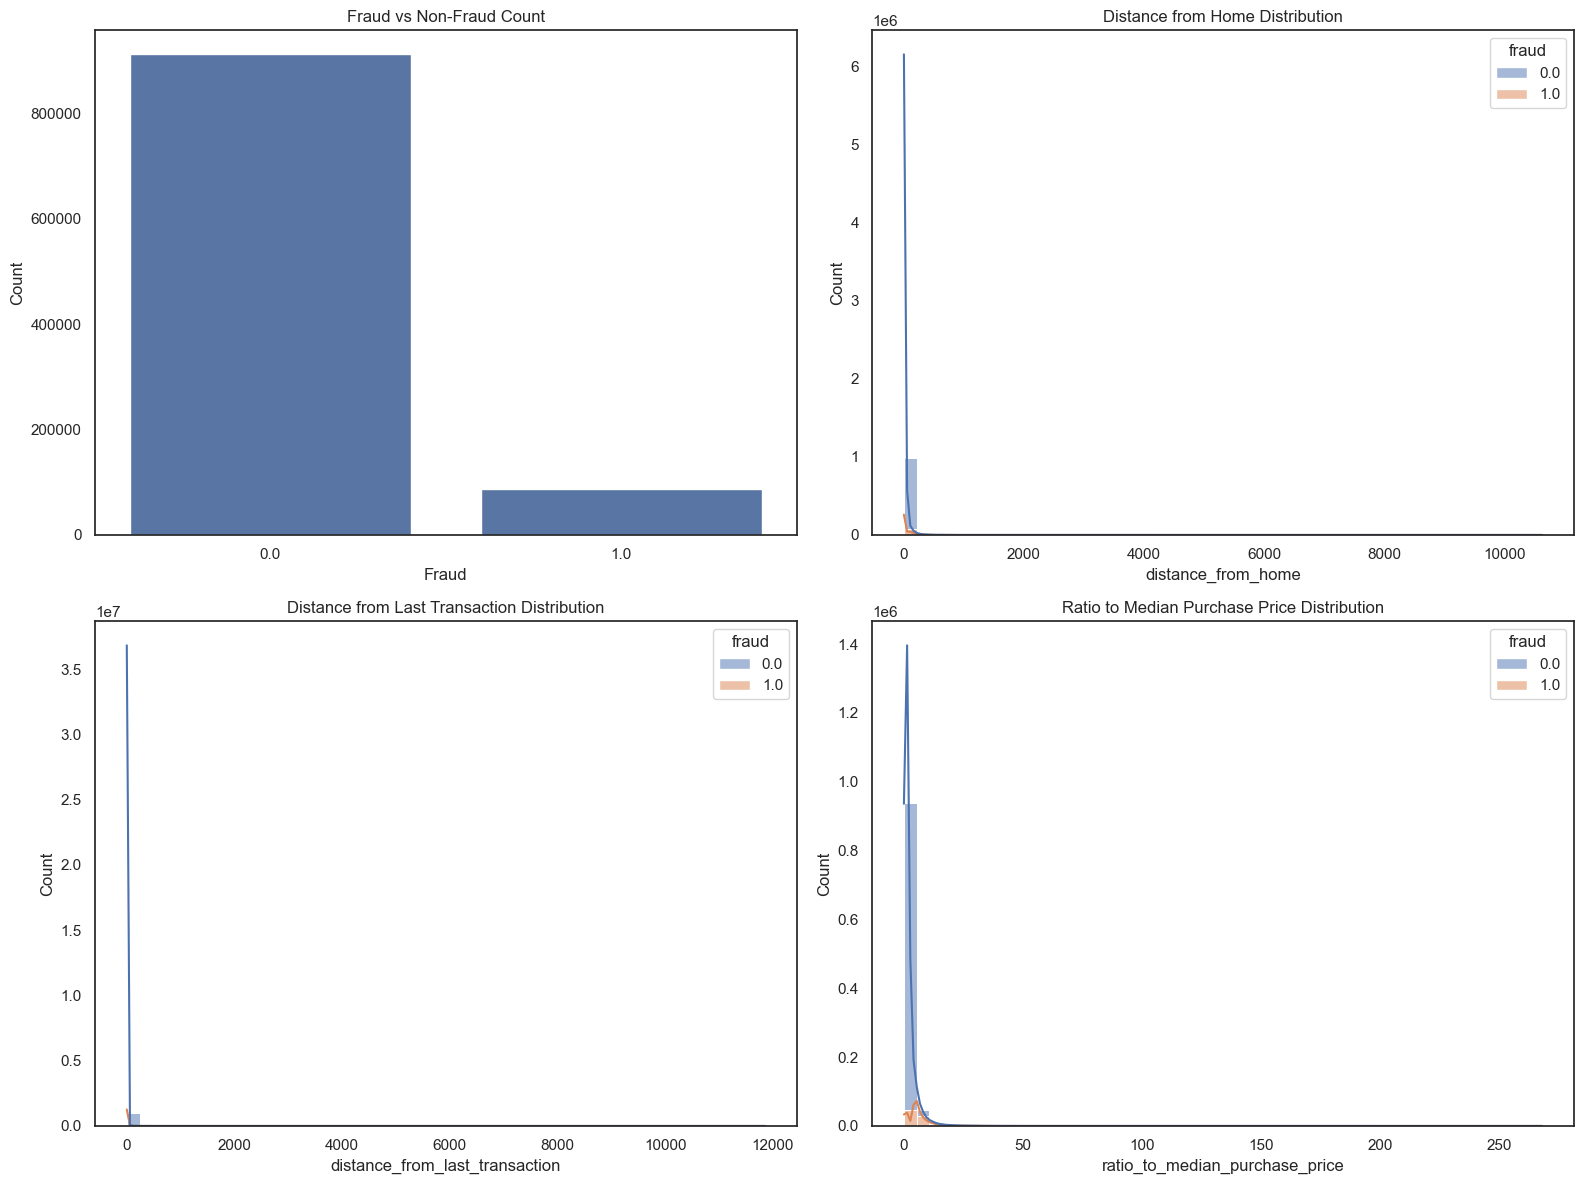

In [7]:
plot_dataset_overview(raw_data)

In [22]:
# Let's create a correlation heatmap and pairplot for deeper understanding

def plot_correlation_and_pairplot(data: pd.DataFrame) -> None:
    '''
    Plot correlation heatmap and pairplot to understand feature relationships
    :param data: pd.DataFrame, contains the data
    :return: None
    '''

    # 1. Correlation heatmap
    plt.figure(figsize=(10, 8))
    corr = data.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Feature Correlation Heatmap')
    plt.savefig('../assets/figures/correlation_heatmap.png')
    plt.show()

    # 2. Pairplot
    plt.figure(figsize=(14, 14))
    selected_features = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price','online_order', 'fraud']
    pairplot = sns.pairplot(
        data[selected_features],
        hue='fraud',
        palette='husl',
        diag_kind='kde',
        corner=True,
        height=4,
        aspect=1.2   # width/height ratio
    )

    pairplot.fig.suptitle('Pairplot of Selected Features Colored by Fraud', y=1.02, fontsize=20)

    pairplot.fig.savefig('../assets/figures/pairplot.png')

    plt.show()


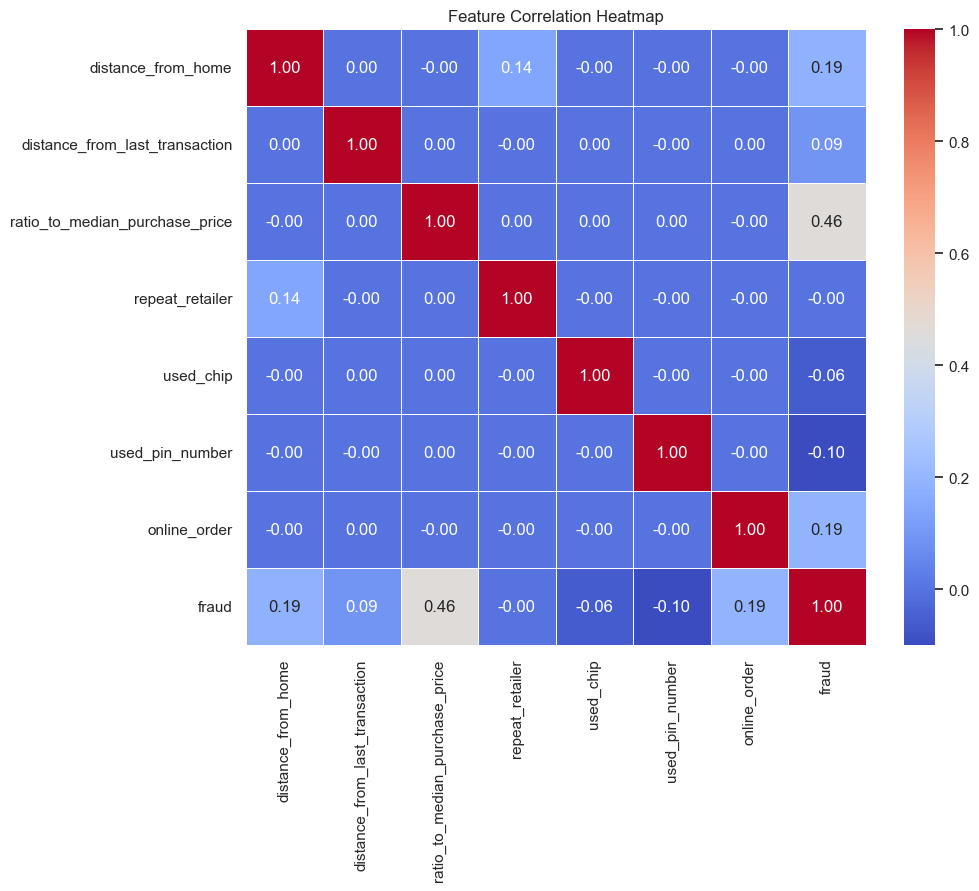

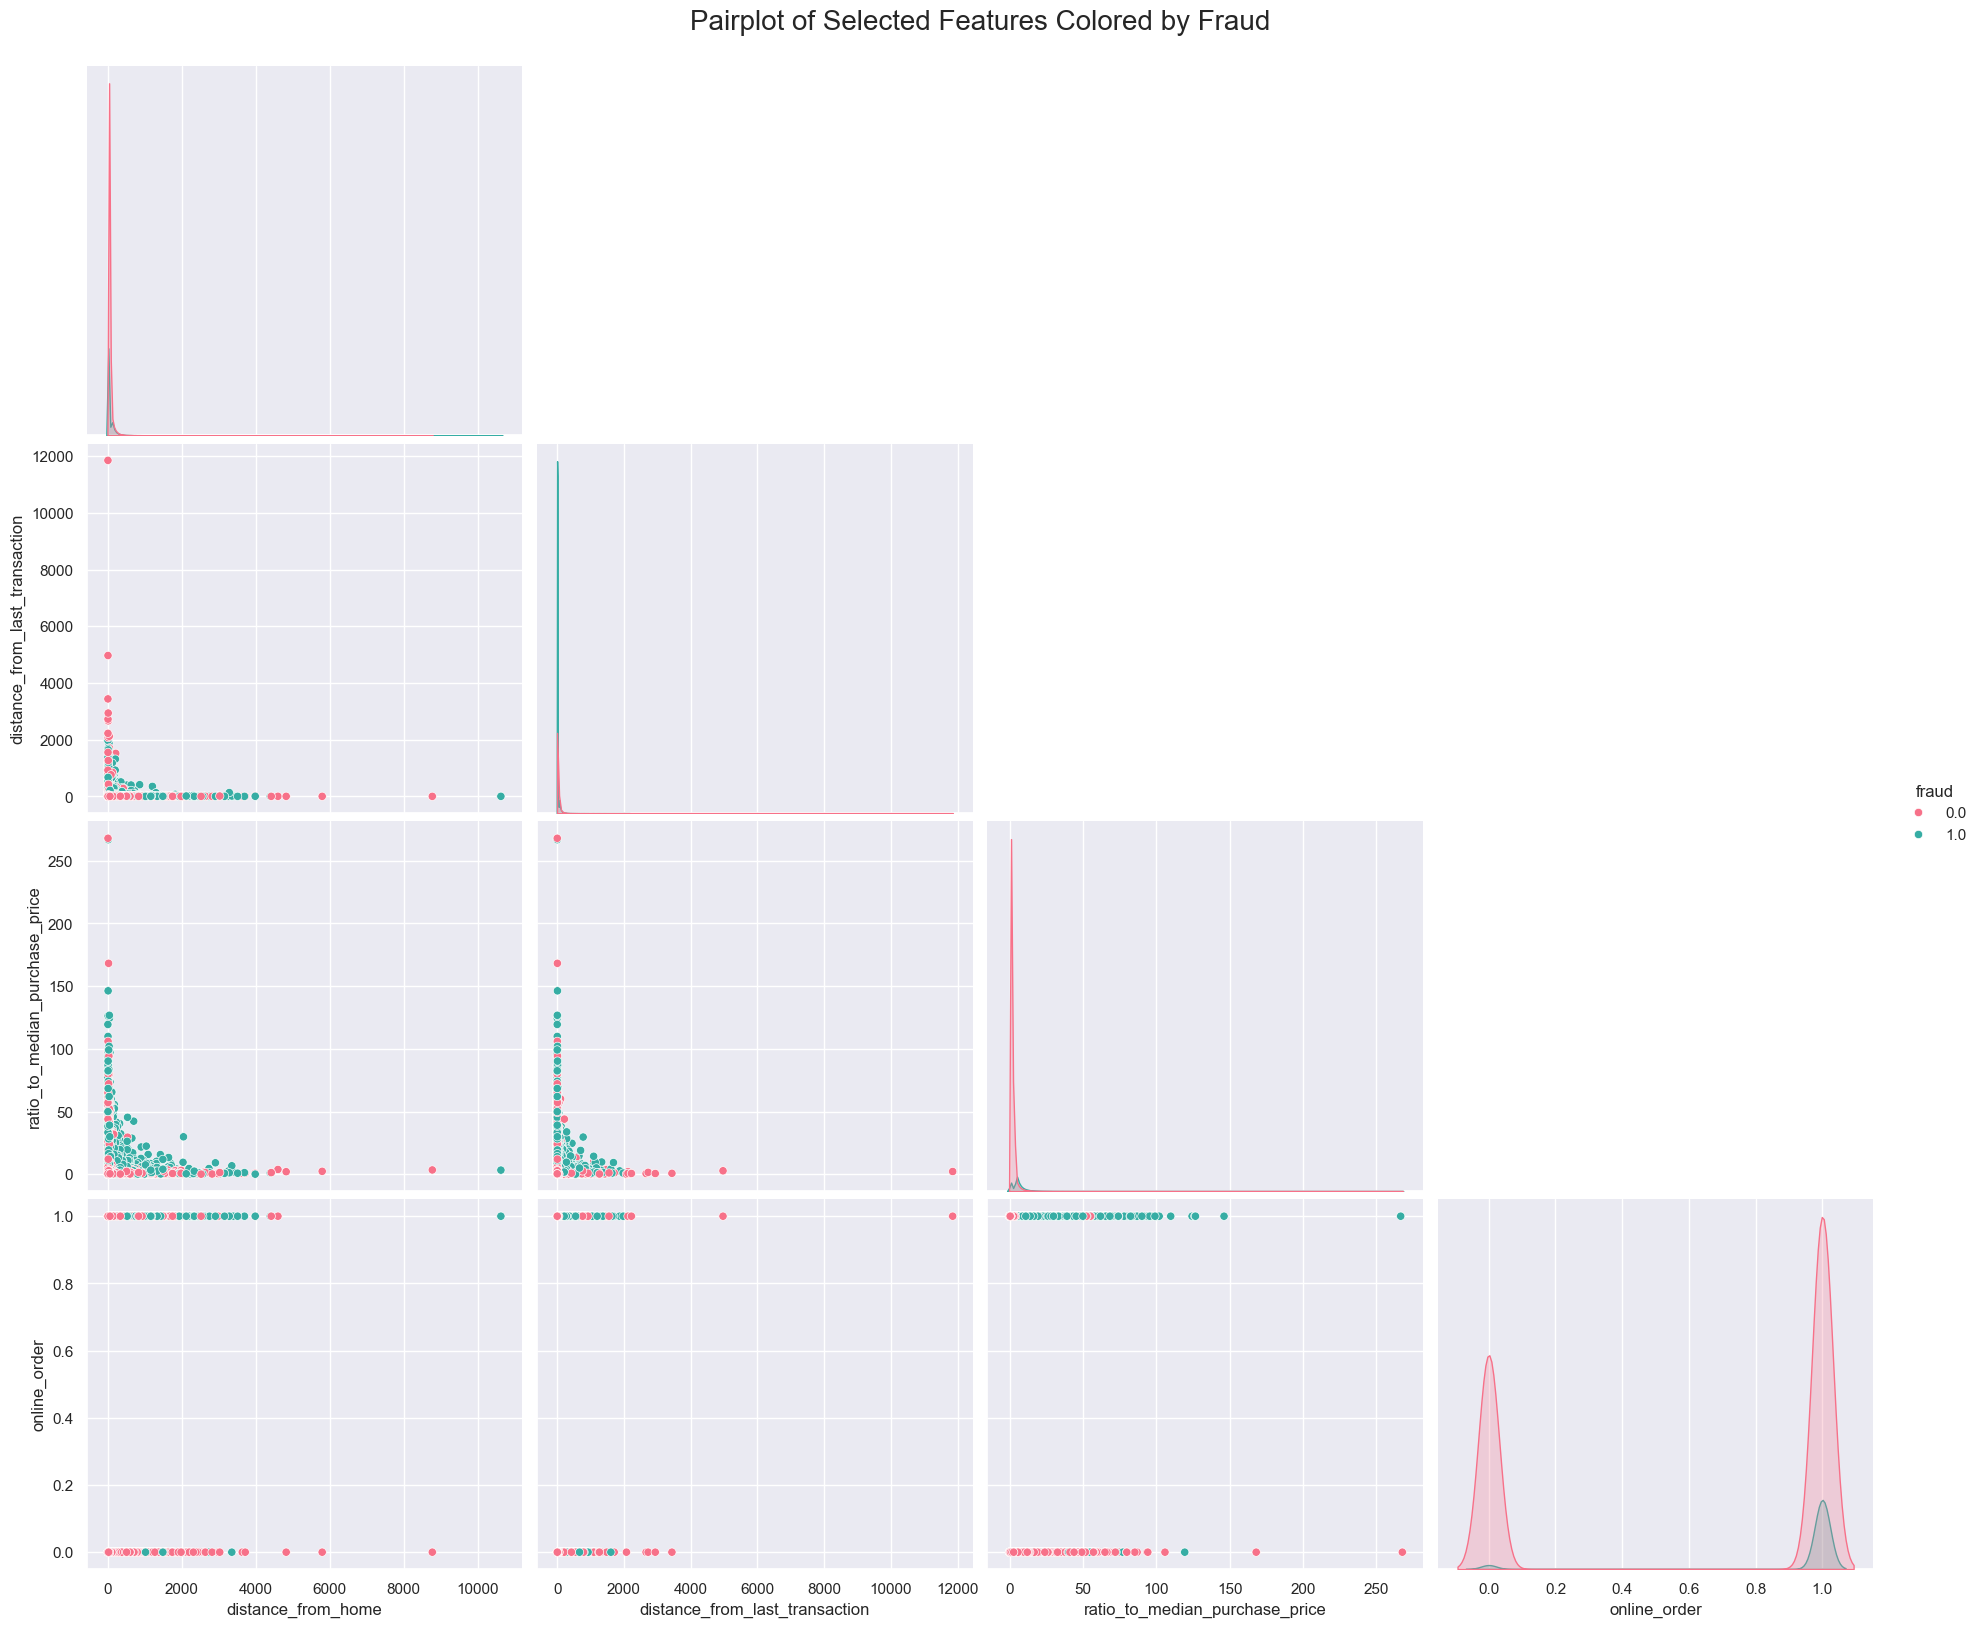

In [21]:
plot_correlation_and_pairplot(raw_data)

In [17]:
print(f"Fraud to not fraud ratio: {(raw_data['fraud']==1).sum()/(raw_data['fraud']==0).sum()}")

Fraud to not fraud ratio: 0.09577392868922427


In [8]:

def process_data_and_save(data: pd.DataFrame,path:str) -> pd.DataFrame:
    '''
    Scaled the data using StandardScaler and save it to ../data/processed_data/card_transdata.csv.
    :param data: Pandas DataFrame, contains the data
    :param path: str, path to save the data
    :return:None
    '''
    scalerstd=StandardScaler()
    colums_to_scale=['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price','repeat_retailer','used_chip','used_pin_number','online_order']
    data[colums_to_scale]=scalerstd.fit_transform(data[colums_to_scale])
    joblib.dump(scalerstd,'../weights/scaler/scaler.pkl')
    data.to_csv(path,index=False)
    return data.head()


In [9]:
save_path='../data/processed_data/card_transdata.csv'
data=process_data_and_save(raw_data,save_path)

In [38]:
data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.477882,-0.182849,0.043491,0.366584,1.361576,-0.334458,-1.364425,0.0
1,-0.241607,-0.188094,-0.189300,0.366584,-0.734443,-0.334458,-1.364425,0.0
2,-0.329369,-0.163733,-0.498812,0.366584,-0.734443,-0.334458,0.732909,0.0
3,-0.372854,0.021806,-0.522048,0.366584,1.361576,-0.334458,0.732909,0.0
4,0.268572,-0.172968,0.142373,0.366584,1.361576,-0.334458,0.732909,0.0
